In [36]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
video_df = pd.read_csv('dataset.csv')

In [12]:
video_df.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount           int64
likeCount           int64
favouriteCount    float64
commentCount        int64
duration           object
definition         object
caption              bool
dtype: object

In [13]:
# Convert count columns to numeric
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [14]:
# Publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [26]:
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [27]:
video_df[['durationSecs', 'duration']]

,durationSecs,duration
0,0 days 00:27:41,PT27M41S
1,0 days 00:00:39,PT39S
2,0 days 00:00:38,PT38S
3,0 days 00:00:49,PT49S
4,0 days 00:00:38,PT38S
...,...,...
864,0 days 00:02:35,PT2M35S
865,0 days 00:02:11,PT2M11S
866,0 days 00:02:18,PT2M18S
867,0 days 00:02:29,PT2M29S


In [32]:
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if pd.isna(x) else len(x))

In [33]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,IFSMQJCda10,Ali Abdaal,5 Actionable Ways to Become More Self-Disciplined,#ad Let BetterHelp connect you to a therapist ...,"['Ali Abdaal', 'Ali abdal', 'how to be more di...",2024-04-12 13:00:27+00:00,19665.0,1620.0,NaN,95.0,PT27M41S,hd,False,Friday,0 days 00:27:41,504
1,B7SNUIq6j1w,Ali Abdaal,Emotions Are Crucial In Any Productivity Frame...,Check out my New York Times bestselling book a...,"['Ali Abdaal', 'Ali abdal']",2024-04-12 12:00:19+00:00,3747.0,307.0,NaN,6.0,PT39S,hd,False,Friday,0 days 00:00:39,27
2,o_F82o-0IoY,Ali Abdaal,Enjoy Every Step Towards Your Goals 🎯,Check out my New York Times bestselling book a...,"['Ali Abdaal', 'Ali abdal']",2024-04-11 12:00:49+00:00,12758.0,1049.0,NaN,7.0,PT38S,hd,False,Thursday,0 days 00:00:38,27
3,5k3uMaJN4IU,Ali Abdaal,Make 2024 The Best Year of Your Life 🎉,Check out my New York Times bestselling book a...,"['Ali Abdaal', 'Ali abdal', 'feel good product...",2024-04-10 12:00:05+00:00,12112.0,705.0,NaN,6.0,PT49S,hd,False,Wednesday,0 days 00:00:49,87
4,KMFR0kj0CE0,Ali Abdaal,Level Up Every Area Of Your Life With These Pr...,Check out my New York Times bestselling book a...,"['Ali Abdaal', 'Ali abdal', 'productivity', 'f...",2024-04-09 12:00:17+00:00,14501.0,756.0,NaN,5.0,PT38S,hd,False,Tuesday,0 days 00:00:38,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,7APfFjfnNBc,Ali Abdaal,Payphone (Maroon 5) - Katherine Macfarland & A...,"First cover of 2017! We both love this song, s...","['payphone', 'maroon 5', 'acoustic cover', 'co...",2017-01-04 23:13:51+00:00,93974.0,2289.0,NaN,145.0,PT2M35S,hd,False,Wednesday,0 days 00:02:35,51
865,gBpBLTSCb4s,Ali Abdaal,6med UKCAT Crash Course - In a Nutshell,The 6med UKCAT Crash Course is the most effect...,"['6med', 'medical school', 'ukcat', 'medicine']",2016-05-09 18:45:18+00:00,16907.0,124.0,NaN,6.0,PT2M11S,hd,False,Monday,0 days 00:02:11,47
866,Va0tSdPADpA,Ali Abdaal,6med BMAT Crash Course - In a Nutshell,The 6med BMAT Crash Course is the most effecti...,"['BMAT', '6med', 'medicine', 'medical students']",2016-04-27 09:04:49+00:00,41389.0,298.0,NaN,9.0,PT2M18S,hd,False,Wednesday,0 days 00:02:18,48
867,XJHM0fEH3ss,Ali Abdaal,Rolling in the Deep (Adele) - Duranka Perera &...,Our first 'proper' video! One of our all-time ...,"['rolling in the deep', 'adele', 'cover', 'aco...",2016-04-05 09:05:29+00:00,63587.0,776.0,NaN,39.0,PT2M29S,hd,False,Tuesday,0 days 00:02:29,53


EDA

<ipython-input-37-a66372ef2879>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


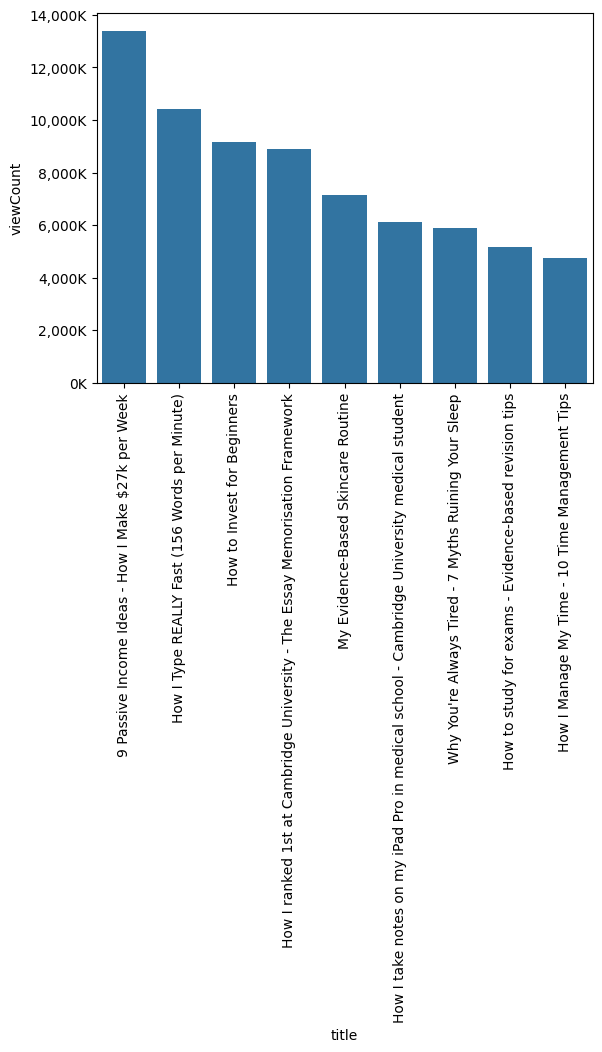

In [37]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<ipython-input-38-c1eabea0af14>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


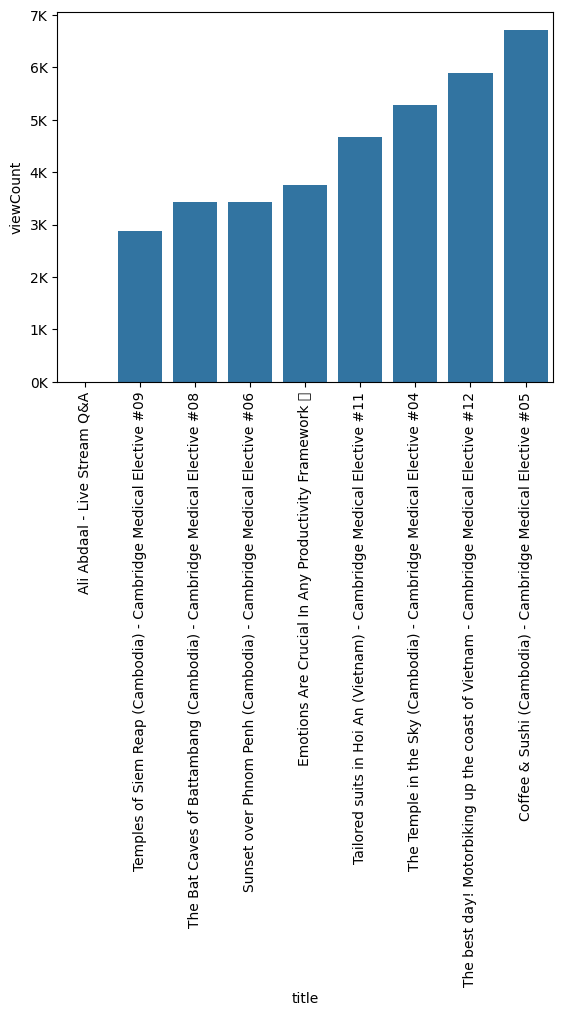

In [38]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<Axes: xlabel='channelTitle', ylabel='viewCount'>

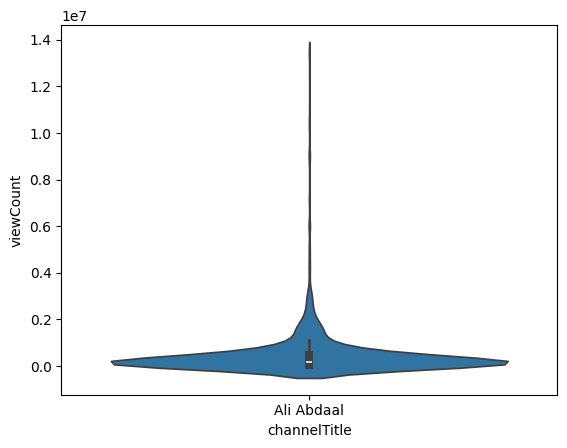

In [41]:
sns.violinplot(x=video_df['channelTitle'], y=video_df['viewCount'])

<Axes: xlabel='likeCount', ylabel='viewCount'>

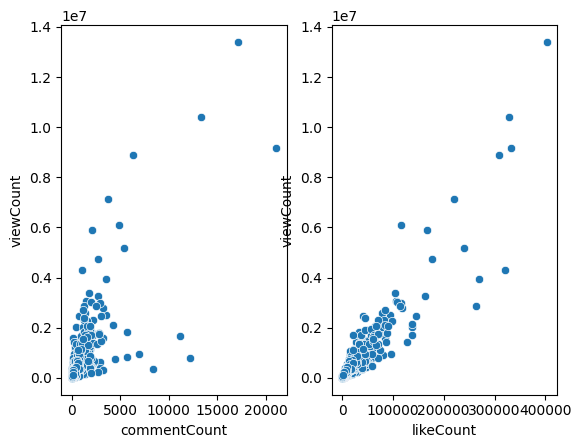

In [42]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

<Axes: xlabel='durationSecs', ylabel='Count'>

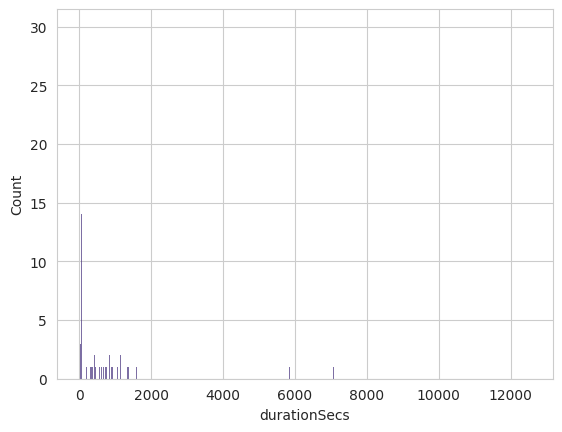

In [47]:
sns.histplot(data=video_df, x='durationSecs', bins=30, binwidth=50, alpha=0.7)

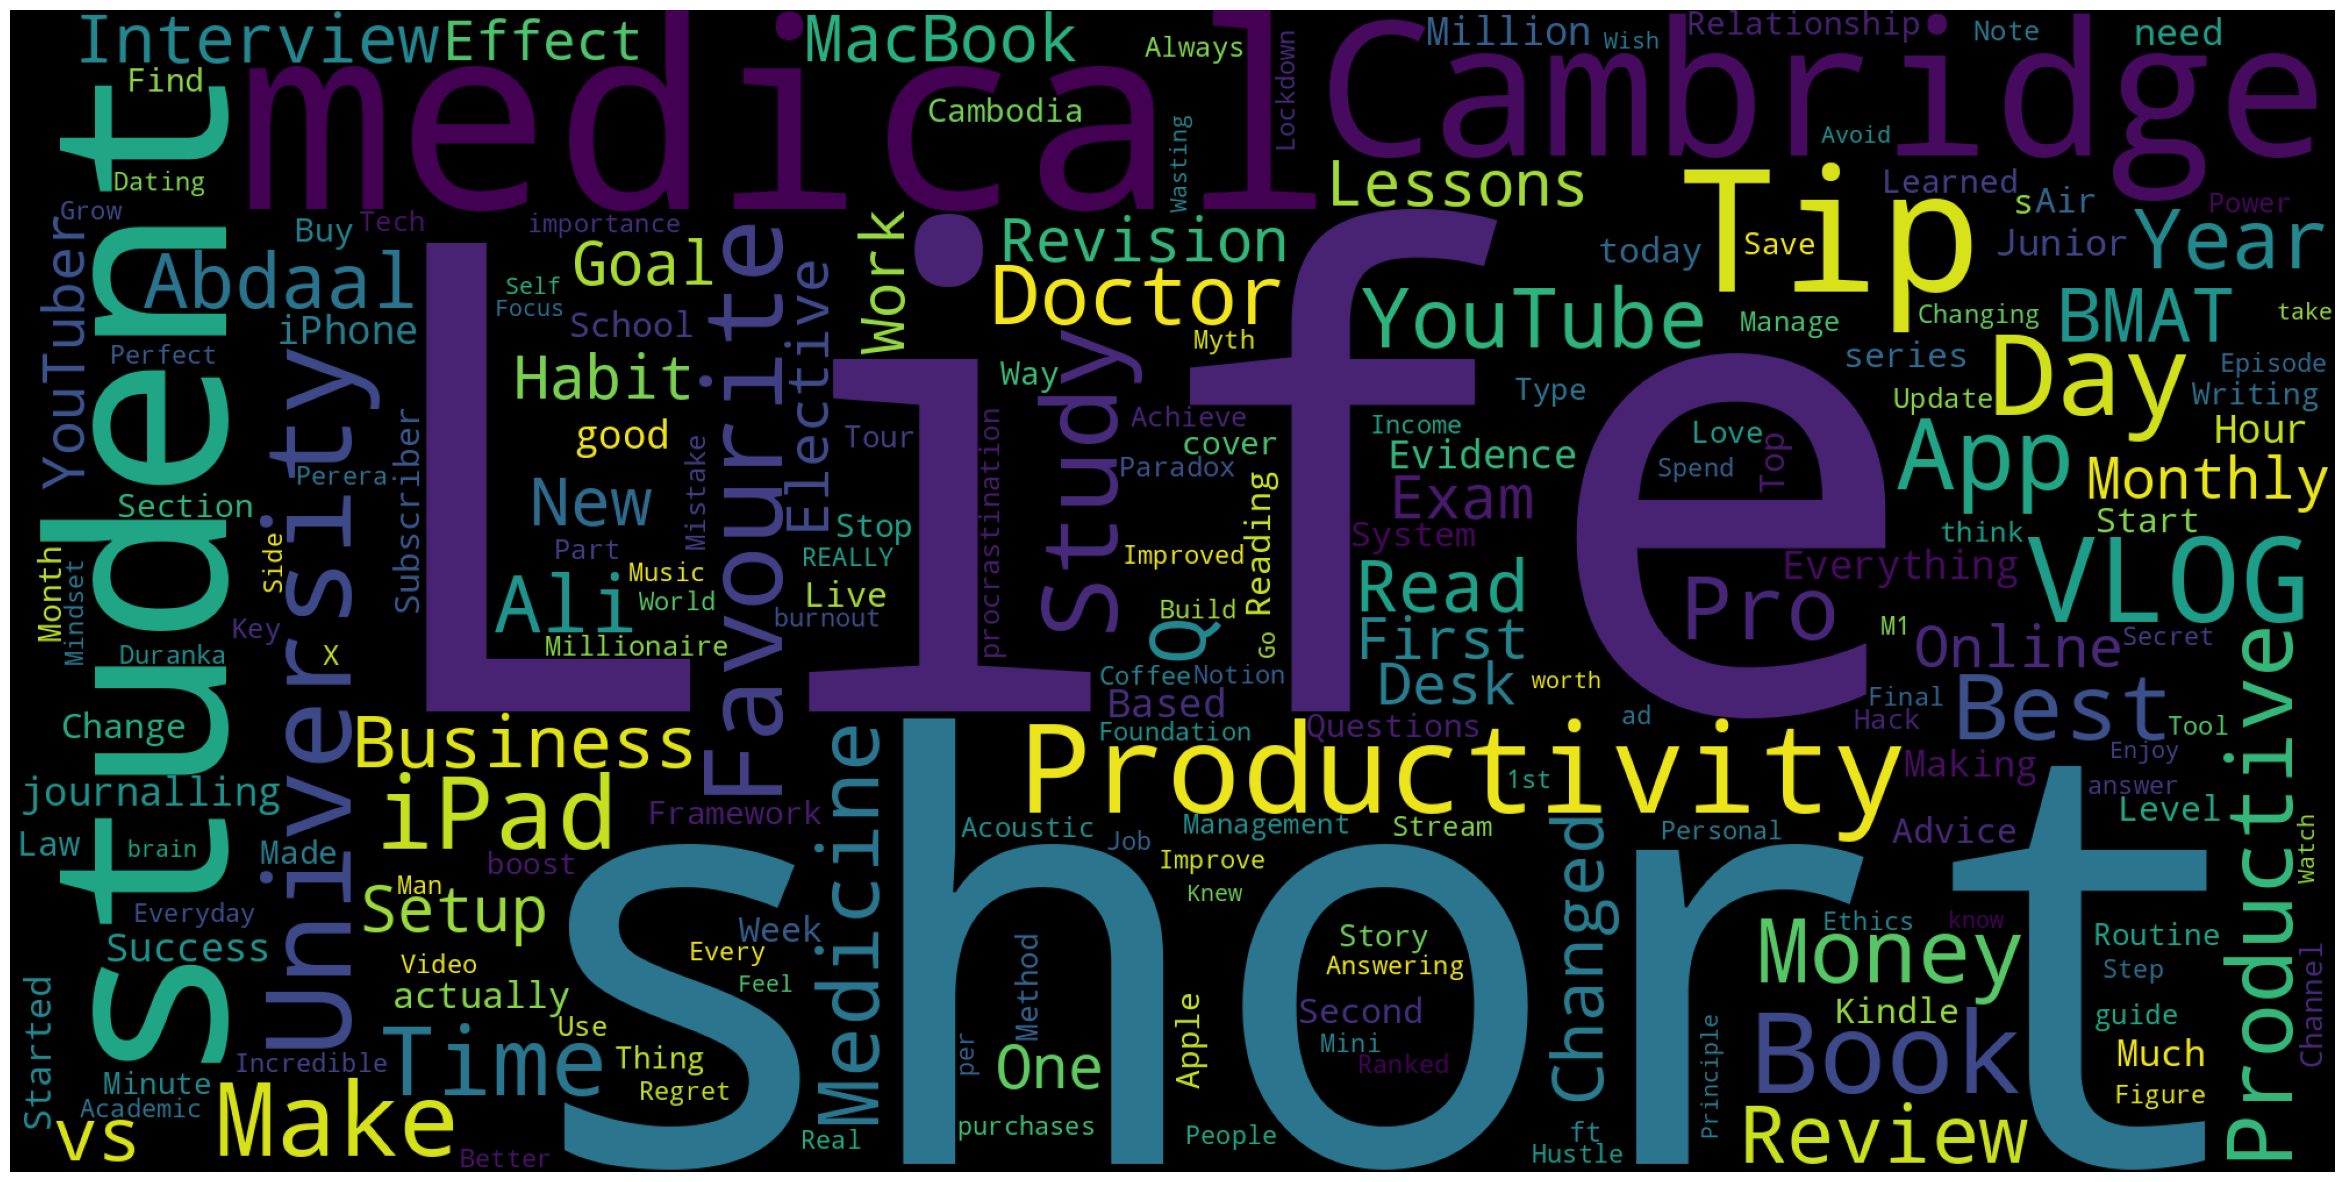

In [48]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)


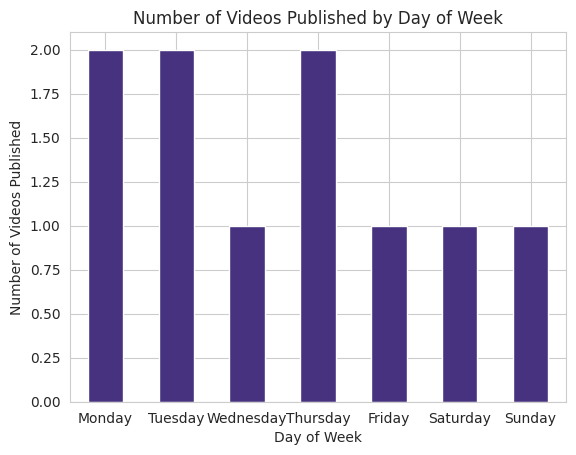

In [56]:
video_df = pd.DataFrame({"pushblishDayName": ['Monday', 'Monday', 'Tuesday', 'Tuesday', 'Wednesday', 'Thursday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})

# Count the number of videos published on each day of the week
day_df = video_df['pushblishDayName'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Plotting the bar chart
ax = day_df.plot(kind='bar', rot=0)
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos Published')
plt.title('Number of Videos Published by Day of Week')
plt.show()